# BIRCH Model

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

In [2]:
#Increase plot size
plt.rcParams["figure.figsize"] = (8,5.5)

### Import cleaned data

In [3]:
#Imported data has been normalised and PCA to one feature
df = pd.read_csv('PC1_with_scaled_X_Y.csv')

In [4]:
df.head()

,Unnamed: 0,x,y,PC1
0,0,0.0,0.356947,-0.018991
1,1,0.0,0.357339,-0.014677
2,2,0.0,0.357730,-0.010282
3,3,0.0,0.358121,-0.005910
4,4,0.0,0.358513,-0.001625


In [5]:
#Drop unused column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.head()

,x,y,PC1
0,0.0,0.356947,-0.018991
1,0.0,0.357339,-0.014677
2,0.0,0.357730,-0.010282
3,0.0,0.358121,-0.005910
4,0.0,0.358513,-0.001625


In [7]:
des = df.describe()
print(des)

                  x             y           PC1
count  5.849199e+06  5.849199e+06  5.849199e+06
mean   4.600322e-01  5.126736e-01  2.287508e-16
std    2.448846e-01  2.528056e-01  1.794885e-01
min    0.000000e+00  0.000000e+00 -2.321955e-01
25%    2.538004e-01  3.045010e-01 -1.176868e-01
50%    4.590218e-01  5.201566e-01 -3.820644e-02
75%    6.645737e-01  7.248532e-01  6.098787e-02
max    1.000000e+00  1.000000e+00  1.860217e+00


### Run BIRCH Algorithm

Run BIRCH algorithm with default threshold (0.5) and branching_factor (50).

In [8]:
model = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.5,
              compute_labels=True)
model.fit(df)

Birch(n_clusters=None)

In [9]:
predicted = model.predict(df)

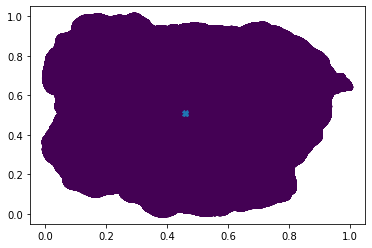

In [10]:
#Plot clusters with X as the centroid
c = model.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

In [11]:
model

Birch(n_clusters=None)

In [12]:
#Output label array generated in model
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
#Number of features in model
model.n_features_in_

3

In [14]:
#Output unique labels in model
model.subcluster_labels_

array([0])

In [15]:
df_results = df
df_results['cluster'] = predicted.tolist()

In [16]:
df_results

,x,y,PC1,cluster
0,0.0,0.356947,-0.018991,0
1,0.0,0.357339,-0.014677,0
2,0.0,0.357730,-0.010282,0
3,0.0,0.358121,-0.005910,0
4,0.0,0.358513,-0.001625,0
...,...,...,...,...
5849194,1.0,0.639922,-0.231353,0
5849195,1.0,0.640313,-0.231447,0
5849196,1.0,0.640705,-0.231534,0
5849197,1.0,0.641096,-0.231605,0


In [17]:
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
predicted.shape

(5849199,)

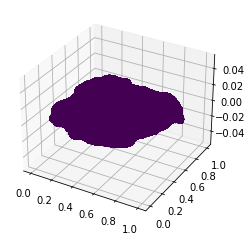

In [19]:
#Generate 3D scatter plot of clusters
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted, c = predicted)
plt.show()

In [20]:
#Number of clusters
np.unique(model.labels_).size

1

## Testing/Metrics

These metrics will fail due to only one cluster/label being created. Further testing needs to be done to optimise threshold.

### Calinski-Harabasz Index
https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.
The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.
The score is fast to compute.

In [21]:
#Calinski-Harabasz Index
from sklearn import metrics
labels = model.labels_
metrics.calinski_harabasz_score(df, labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### Davies-Bouldin Index
https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

If the ground truth labels are not known, the Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters. This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves. Zero is the lowest possible score. Values closer to zero indicate a better partition. The computation of Davies-Bouldin is simpler than that of Silhouette scores. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances.

In [ ]:
# Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score
labels = model.labels_
davies_bouldin_score(df, labels)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## Test different values of threshold

In [22]:
#Libraries required for metric tests
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

### Threshold = 0.1

Test model with threshold = 0.1 and default branching factor.

In [23]:
model_t1 = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.1,
              compute_labels=True)
model_t1.fit(df)

predicted_t1 = model_t1.predict(df)

In [24]:
model_t1

Birch(n_clusters=None, threshold=0.1)

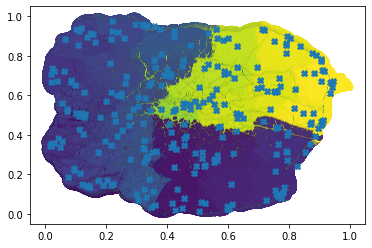

In [25]:
c = model_t1.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t1)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

In [26]:
#Number of clusters
np.unique(model_t1.labels_).size

262

In [27]:
#Calinski-Harabasz Index
labels_t1 = model_t1.labels_
metrics.calinski_harabasz_score(df, labels_t1)

729622.0296642663

In [28]:
# Davies-Bouldin Index
labels_t1 = model_t1.labels_
davies_bouldin_score(df, labels_t1)

1.0364289687098183

0.1 Threshold generates 270 clusters. Further testing above and below this threshold is required.

### Threshold = 0.05

Test model with threshold = 0.05 and default branching factor.

In [29]:
model_t2 = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.05,
              compute_labels=True)
model_t2.fit(df)

predicted_t2 = model_t2.predict(df)

In [30]:
model_t2

Birch(n_clusters=None, threshold=0.05)

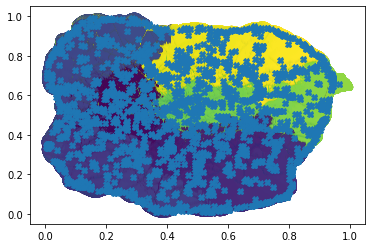

In [31]:
c = model_t2.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t2)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

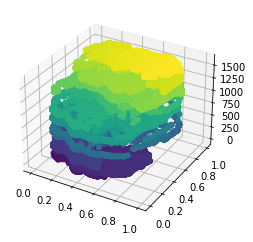

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t2, c = predicted_t2)
plt.show()

In [33]:
#Number of clusters
np.unique(model_t2.labels_).size

1591

In [34]:
#Calinski-Harabasz Index
labels_t2 = model_t2.labels_
metrics.calinski_harabasz_score(df, labels_t2)

409985.85669340077

In [35]:
# Davies-Bouldin Index
labels_t2 = model_t2.labels_
davies_bouldin_score(df, labels_t2)

1.040432248266228

Threshold of 0.05 results in too many clusters. Metric scores are worse than the 0.1 threshold.

### Threshold = 0.2

Test model with threshold = 0.2 and default branching factor.

In [36]:
model_t3 = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.2,
              compute_labels=True)
model_t3.fit(df)

predicted_t3 = model_t3.predict(df)

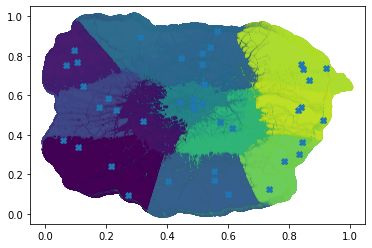

In [37]:
c = model_t3.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t3)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

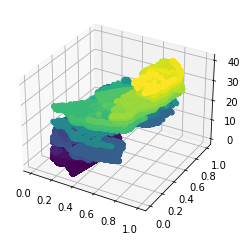

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t3, c = predicted_t3)
plt.show()

In [39]:
#Number of clusters
np.unique(model_t3.labels_).size

41

In [40]:
#Calinski-Harabasz Index
labels_t3 = model_t3.labels_
metrics.calinski_harabasz_score(df, labels_t3)

1160083.21525828

In [41]:
# Davies-Bouldin Index
labels_t3 = model_t3.labels_
davies_bouldin_score(df, labels_t3)

1.0759381481655343

Threshold of 0.2 results in fewer clusters and metric scores are better than the 0.1 threshold.

### Threshold = 0.35

Test model with threshold = 0.35 and default branching factor.

In [42]:
model_t4 = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.35,
              compute_labels=True)
model_t4.fit(df)

predicted_t4 = model_t4.predict(df)

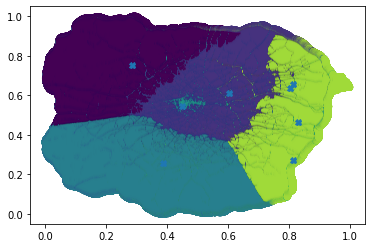

In [43]:
c = model_t4.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t4)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

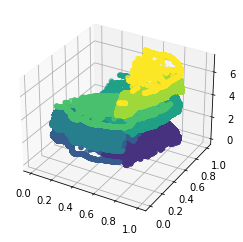

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t4, c = predicted_t4)
plt.show()

In [45]:
#Number of clusters
np.unique(model_t4.labels_).size

8

In [46]:
#Calinski-Harabasz Index
labels_t4 = model_t4.labels_
metrics.calinski_harabasz_score(df, labels_t4)

1583113.8823658004

In [47]:
# Davies-Bouldin Index
labels_t4 = model_t4.labels_
davies_bouldin_score(df, labels_t4)

1.208912774366334

Threshold of 0.35 results in fewer clusters than 0.2 and metric scores are better.

### Threshold = 0.425

Test model with threshold = 0.425 and default branching factor.

In [48]:
model_t5 = Birch(branching_factor = 50,
              n_clusters = None,
              threshold = 0.425,
              compute_labels=True)
model_t5.fit(df)

predicted_t5 = model_t5.predict(df)

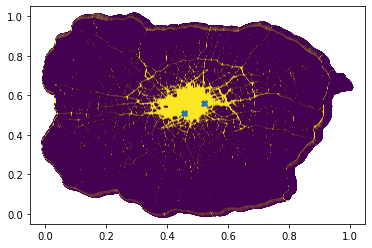

In [49]:
c = model_t5.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t5)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

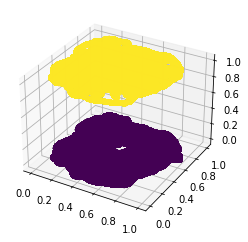

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t5, c = predicted_t5)
plt.show()

In [51]:
#Number of clusters
np.unique(model_t5.labels_).size

2

In [52]:
#Calinski-Harabasz Index
labels_t5 = model_t5.labels_
metrics.calinski_harabasz_score(df, labels_t5)

728106.5372593525

In [53]:
# Davies-Bouldin Index
labels_t5 = model_t5.labels_
davies_bouldin_score(df, labels_t5)

1.4156245413996824

Threshold of 0.425 results in 2 clusters. Metric scores are worse than 0.35 threshold however the emissions can clearly be seen on the roads.

The optimal threshold appears to be about 0.35 with 9 clusters being created. Further testing can be done with threshold values around 3.5 to find the optimal value. 

### Branching Factor = 10

Test model with threshold = 0.35 and branching factor = 10.

In [54]:
model_t6 = Birch(branching_factor = 10,
              n_clusters = None,
              threshold = 0.35,
              compute_labels=True)
model_t6.fit(df)

predicted_t6 = model_t6.predict(df)

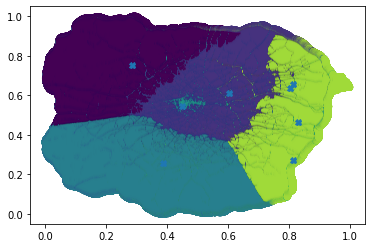

In [55]:
c = model_t6.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t6)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

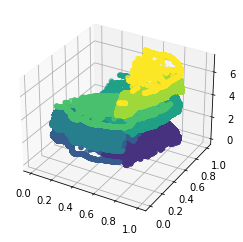

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t6, c = predicted_t6)
plt.show()

In [57]:
#Number of clusters
np.unique(model_t6.labels_).size

8

In [58]:
#Calinski-Harabasz Index
labels_t6 = model_t6.labels_
metrics.calinski_harabasz_score(df, labels_t6)

1583113.8823658004

In [59]:
# Davies-Bouldin Index
labels_t6 = model_t6.labels_
davies_bouldin_score(df, labels_t6)

1.208912774366334

Branching factor of 10 produces same results as branching factor 50.

### Branching Factor = 5

Test model with threshold = 0.35 and branching factor = 5.

In [60]:
model_t7 = Birch(branching_factor = 5,
              n_clusters = None,
              threshold = 0.35,
              compute_labels=True)
model_t7.fit(df)

predicted_t7 = model_t7.predict(df)

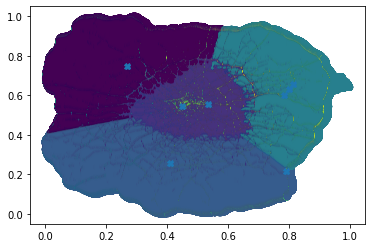

In [61]:
c = model_t7.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t7)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

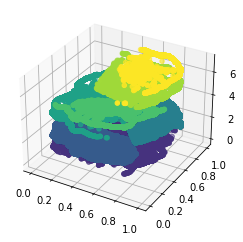

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t7, c = predicted_t7)
plt.show()

In [63]:
#Number of clusters
np.unique(model_t7.labels_).size

8

In [64]:
#Calinski-Harabasz Index
labels_t7 = model_t7.labels_
metrics.calinski_harabasz_score(df, labels_t7)

1662133.8828740758

In [65]:
# Davies-Bouldin Index
labels_t7 = model_t7.labels_
davies_bouldin_score(df, labels_t7)

1.094470508207067

Branching factor of 5 produces 10 clusters but metric scores are worse than the default factor of 50.

### Branching Factor = 8

Test model with threshold = 0.35 and branching factor = 8.

In [66]:
model_t8 = Birch(branching_factor = 8,
              n_clusters = None,
              threshold = 0.35,
              compute_labels=True)
model_t8.fit(df)

predicted_t8 = model_t8.predict(df)

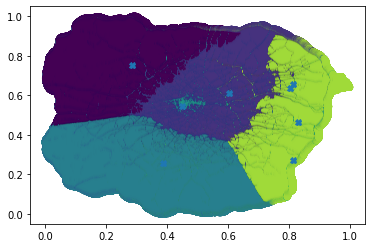

In [67]:
c = model_t8.subcluster_centers_
plt.scatter(df['x'], df['y'], c = predicted_t8)
plt.plot(c[:,0], c[:,1], 'X')
plt.show()

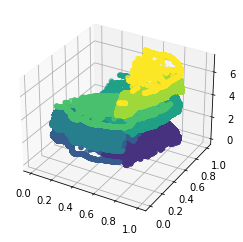

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], predicted_t8, c = predicted_t8)
plt.show()

In [69]:
#Number of clusters
np.unique(model_t8.labels_).size

8

In [70]:
#Calinski-Harabasz Index
labels_t8 = model_t8.labels_
metrics.calinski_harabasz_score(df, labels_t8)

1583113.8823658004

In [71]:
# Davies-Bouldin Index
labels_t8 = model_t8.labels_
davies_bouldin_score(df, labels_t8)

1.208912774366334

Branching factor of 8 creates 9 clusters as per factor of 50 however the clusters are better defined based on the Calinski-Harabasz Index.

### Optimal parameters

The optimal parameters based on the above testing are a branching factor of 8 and threshold of 0.35.